# Package import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
import seaborn as sns
from ggplot import *
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
random.seed(9001) # For Reproducibility of Results
%matplotlib inline
pd.set_option('display.max_rows', 300)

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


# Data Load

In [2]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeSector/populationCount.csv', skiprows=8) # 8039*8
ethnicMinority = pd.read_csv('postcodeSector/Ethnic.csv', skiprows=8)  # 8039*96
ageStructure = pd.read_csv('postcodeSector/ageStructure.csv', skiprows=8) #8039*20
relationalSituation = pd.read_csv('postcodeSector/relational.csv', skiprows=8) #8039*8
livingArrangements = pd.read_csv('postcodeSector/livingArrangements.csv', skiprows=8) #8039*9
householdComposition = pd.read_csv('postcodeSector/householdComposition.csv', skiprows=8) #8039*23
notInEmploymentDependencies = pd.read_csv('postcodeSector/notInEmploymentDependencies.csv', skiprows=8) #8039*10
loneParentDependencies = pd.read_csv('postcodeSector/loneParentDependencies.csv', skiprows=8)#8039*13
ethnicGroup = pd.read_csv('postcodeSector/ethnicGroup.csv', skiprows=8) #8039*25
industry = pd.read_csv('postcodeSector/industry.csv', skiprows=8)#8039*26
tenure = pd.read_csv('postcodeSector/tenure.csv', skiprows=8) #8039*8
hoursWorked = pd.read_csv('postcodeSector/hoursWorked.csv', skiprows=8) #8039*6
dwelling = pd.read_csv('postcodeSector/dwelling.csv', skiprows=8) #8039*5
englishProf = pd.read_csv('postcodeSector/englishProf.csv', skiprows=8) #8039*7
centralHeating = pd.read_csv('postcodeSector/centralHeating.csv', skiprows=8) #8039*9
passportHeld = pd.read_csv('postcodeSector/passportHeld.csv', skiprows=7) #8039*73
birthCountry = pd.read_csv('postcodeSector/birthCountry.csv', skiprows=8) #8039*9
religion = pd.read_csv('postcodeSector/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeSector/generalHealth.csv', skiprows=8) #8039*7
yearLastWorked = pd.read_csv('postcodeSector/yearLastWorked.csv', skiprows=8) #8039*13
householdSize = pd.read_csv('postcodeSector/householdSize.csv', skiprows=8) #8039*10
carOrVanAvailability = pd.read_csv('postcodeSector/carOrVanAvailability.csv', skiprows=8) #8039*7
distanceTravelledtoWork = pd.read_csv('postcodeSector/distanceTravelledtoWork.csv', skiprows=8) #8039*14
methodofTraveltoWork = pd.read_csv('postcodeSector/methodofTraveltoWork.csv', skiprows=8) #8039*14
ageofArrival = pd.read_csv('postcodeSector/ageofArrival.csv', skiprows=8) #8039*19
lengthofResidence = pd.read_csv('postcodeSector/lengthofResidence.csv', skiprows=8) #8039*7
occupationType = pd.read_csv('postcodeSector/occupation.csv', skiprows=8) #8039*11
mainLanguage = pd.read_csv('postcodeSector/mainLanguage.csv', skiprows=8) #8039*105
bedrooms = pd.read_csv('postcodeSector/bedrooms.csv', skiprows=8) #8039*8
longTermDisability = pd.read_csv('postcodeSector/longTermDisability.csv', skiprows=8) #8039*5
economicActivity = pd.read_csv('postcodeSector/economicActivity.csv', skiprows=8) #8039*17
positionInCommunalEstablishment = pd.read_csv('postcodeSector/positionInCommunalEstablishment.csv', skiprows=8) #8039*5
accomType = pd.read_csv('postcodeSector/accomType.csv', skiprows=8) #8039*13
secondAddress = pd.read_csv('postcodeSector/secondAddress.csv', skiprows=8) #8039*6
formerIndustry = pd.read_csv('postcodeSector/formerIndustry.csv', skiprows=8) #8039*11
formerOccupation = pd.read_csv('postcodeSector/formerOccupation.csv', skiprows=8) #8039*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeSector/qualification.csv', skiprows=8) #8039*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [3]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [4]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    33.2
Name: 0.7, dtype: float64

In [5]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=35, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

postcode sector  target     perc
classification                                  
0                          5988    5988  0.74524
1                          2047    2047  0.25476

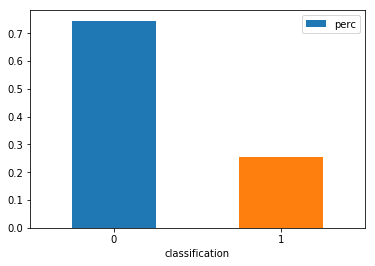

In [6]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [7]:
###Merge different datasets
newDF = [population, ethnicMinority, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode sector') for i in newDF],axis=1, join='outer')

In [8]:
#Check for dimensions
newDF2.shape

(8039, 735)

In [9]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(8035, 735)

In [10]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [11]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

In [12]:
newDF4.shape

(8035, 706)

In [13]:
y = newDF4.classification
print(type(y))
y = y.to_frame().reset_index()
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
x = newDF4.drop(['target','classification'], axis=1)

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=50)

principalComponents = pca.fit_transform(x)

In [15]:
components=[]
i=0

In [16]:
while i <50:
    i = i+1
    word = "component " +str(i)
    components.append(word)

In [17]:
principalDF = pd.DataFrame(data = principalComponents
             , columns = components)

In [18]:
principalDF.head()

component 1  component 2  component 3  component 4  component 5  \
0    -3.808828     4.250334    -4.006620    -0.557666    -3.661837   
1    -0.588977     3.547062    -1.327308     0.469433    -2.290111   
2    -5.790385     7.635122    -3.659300    -0.297582    -0.738241   
3     7.005280    -1.652288    -8.688935     1.710087    -9.623923   
4    14.338116     2.143885    -4.414971     0.377219    -4.008447   

   component 6  component 7  component 8  component 9  component 10  \
0    -1.244697    -0.018962    -1.276207    -2.781616     -1.004747   
1     0.471353    -0.919674     0.146743    -1.796849     -0.472820   
2     1.003634    -0.383163    -2.796183    -3.591712     -0.661253   
3    -1.412462     1.662767     1.047866    -4.077077      0.795070   
4    -0.439821    -1.408967    -1.440709    -4.452422     -0.037393   

       ...       component 41  component 42  component 43  component 44  \
0      ...           0.768422     -0.013567      0.305530      1.289591   
1      ...           0.807552      0.339273      0.059475      0.681465   
2      ...           1.706186      0.271114      0.230994      0.387288   
3      ...           2.215179      1.129722     -0.649622      0.713301   
4      ...           1.553169      0.133482     -1.316865      1.252212   

   component 45  component 46  component 47  component 48  component 49  \
0     -1.739591     -0.814558      0.862487     -1.630727     -0.201567   
1     -0.670865     -0.885136     -0.690015     -2.000348      0.318224   
2     -2.310999     -1.763053      0.074049     -1.657357      0.966804   
3     -2.862049     -1.676397      0.572797     -0.316033      0.389406   
4     -2.003271     -1.026537      0.465506     -1.925238     -1.904171   

   component 50  
0      1.276047  
1     -0.332284  
2     -0.193900  
3      1.152257  
4     -0.508875  

[5 rows x 50 columns]

In [19]:
#HYPER PARAMETER TUNE
Perplexity = [15,45]
n_iter = [250,500,750,1000]
learningRate = [100,250,500,750]


In [20]:
def tSNEOptinmisation(i,j,k,principalDF):
    #define parameters
    tsne = TSNE(n_components=2, perplexity=i, n_iter=j,learning_rate=k)
    #train model
    tsne_results = tsne.fit_transform(principalDF)
    return tsne_results
    
    
    

  Perplexity =15          No of Iterations =250         Learning Rate =100


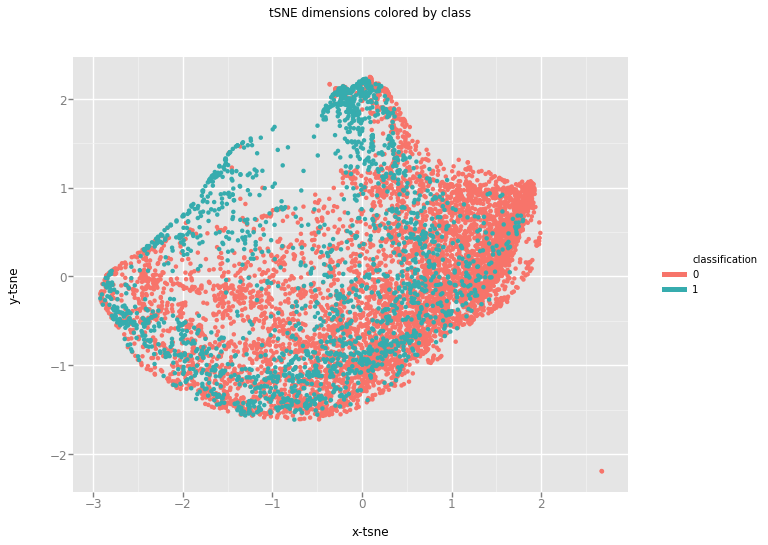

<ggplot: (-9223371895411177468)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =250         Learning Rate =250


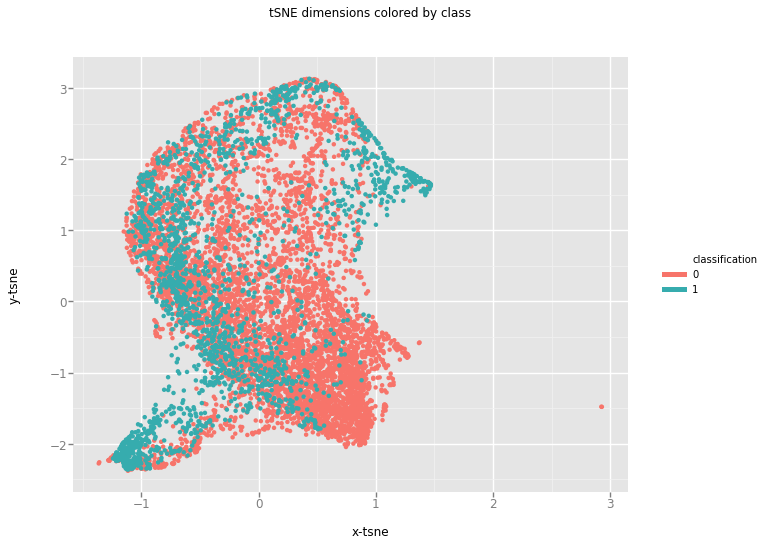

<ggplot: (141464133461)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =250         Learning Rate =500


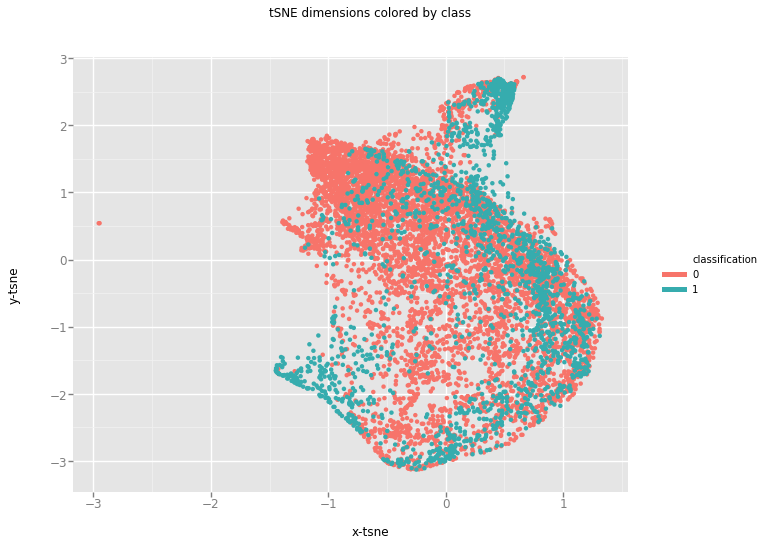

<ggplot: (141463935394)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =250         Learning Rate =750


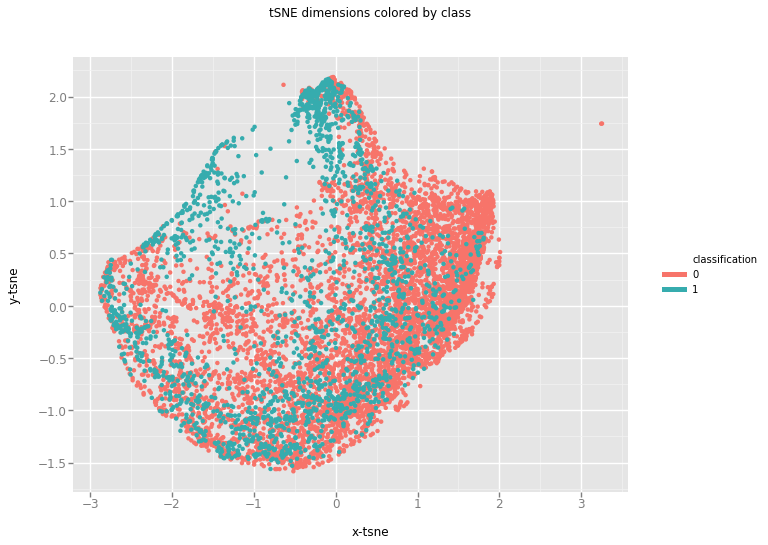

<ggplot: (-9223371895390634524)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =500         Learning Rate =100


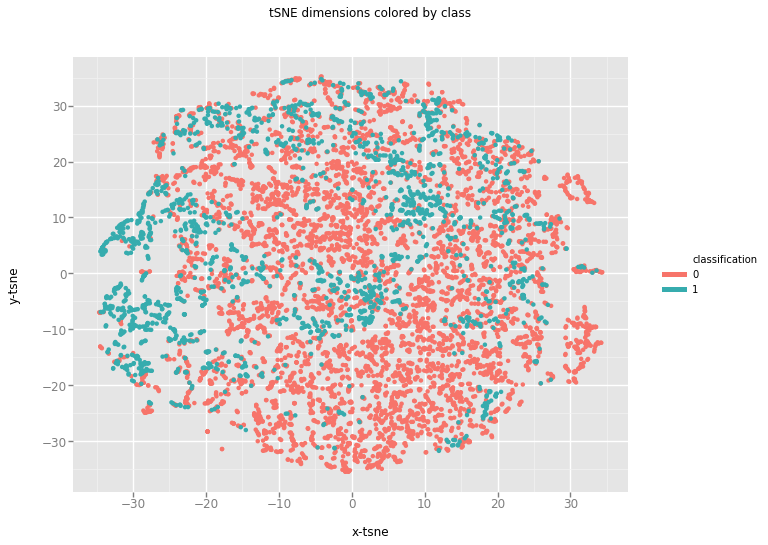

<ggplot: (141464141092)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =500         Learning Rate =250


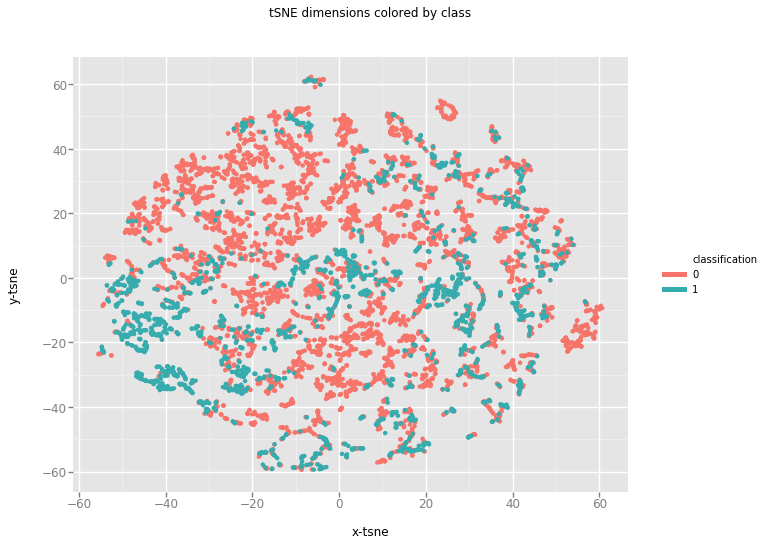

<ggplot: (-9223371895390467184)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =500         Learning Rate =500


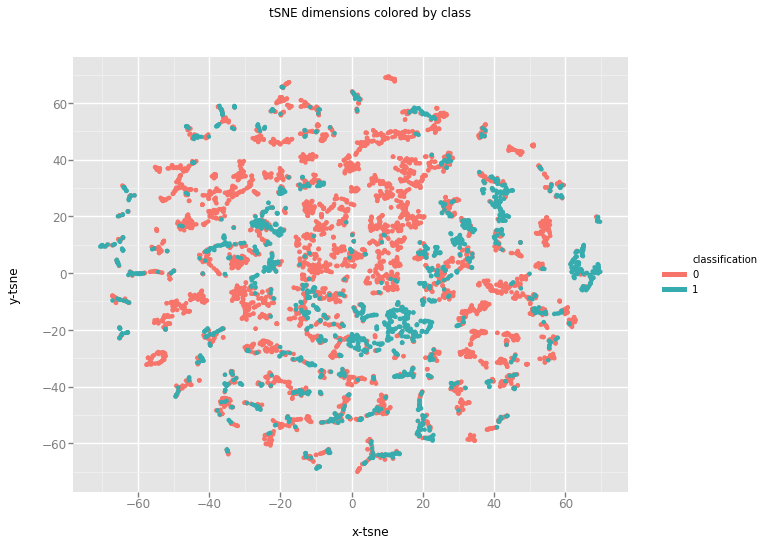

<ggplot: (141332628849)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =500         Learning Rate =750


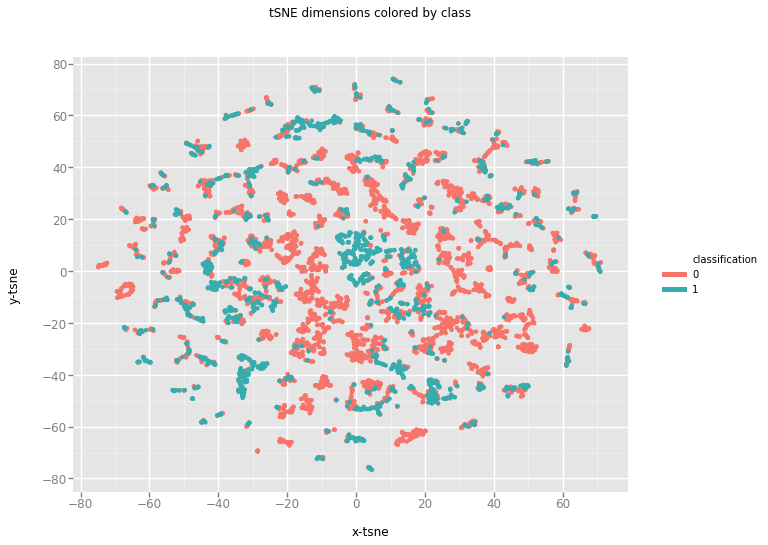

<ggplot: (141332639685)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =750         Learning Rate =100


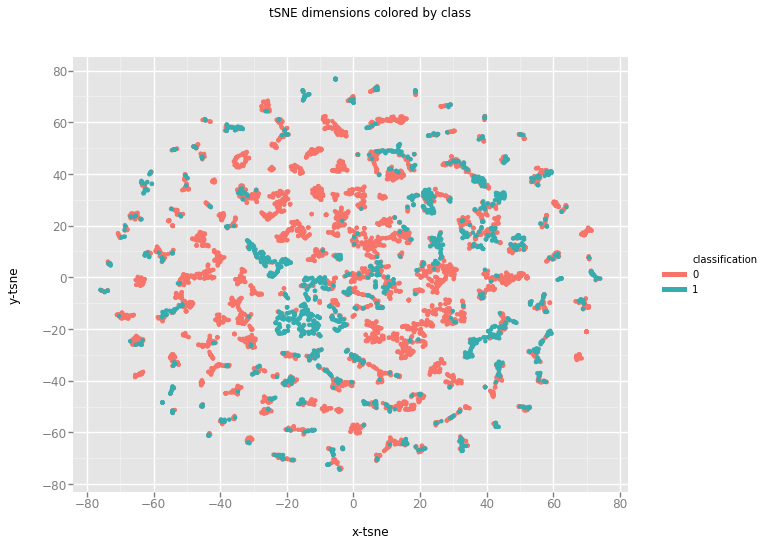

<ggplot: (-9223371895519250933)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =750         Learning Rate =250


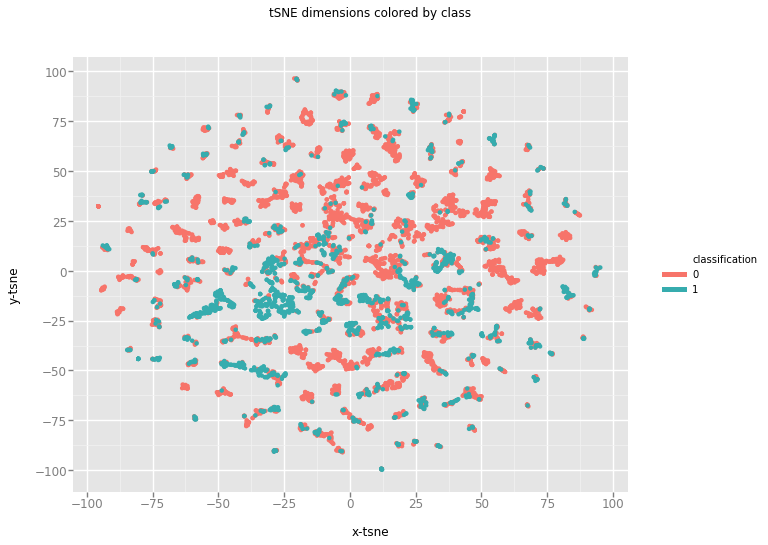

<ggplot: (-9223371895522624049)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =750         Learning Rate =500


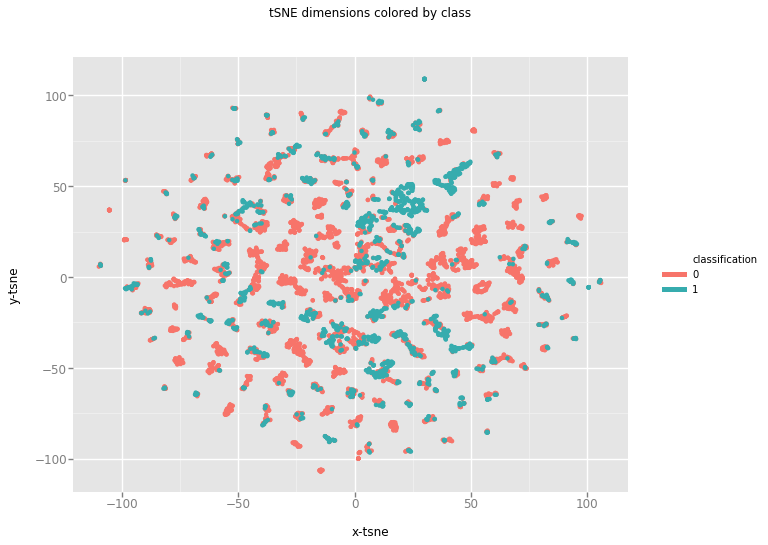

<ggplot: (-9223371895522611154)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =750         Learning Rate =750


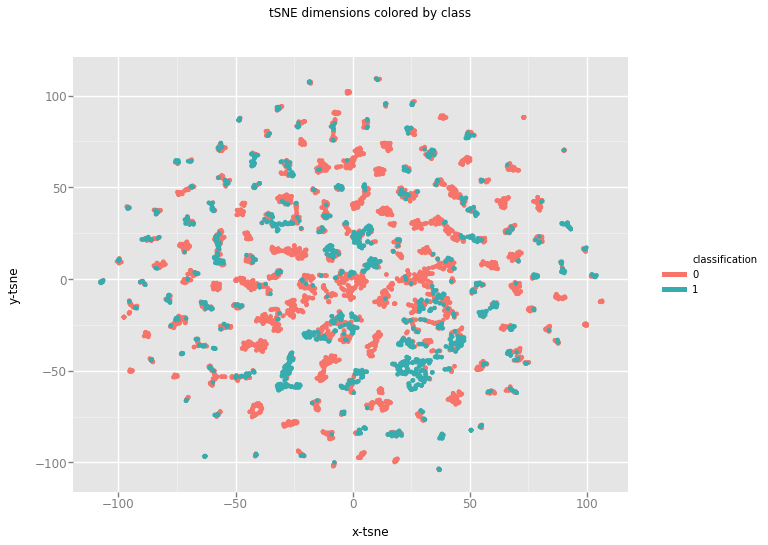

<ggplot: (-9223371895522307847)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =1000         Learning Rate =100


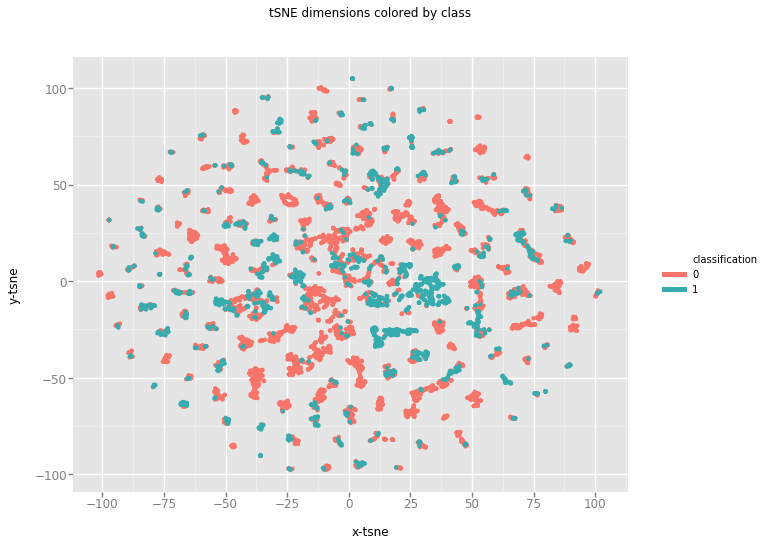

<ggplot: (-9223371895522574399)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =1000         Learning Rate =250


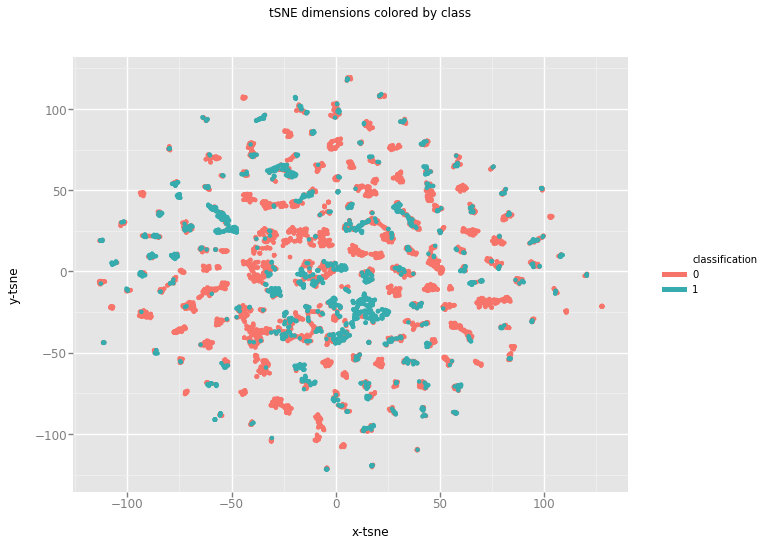

<ggplot: (-9223371895522254069)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =1000         Learning Rate =500


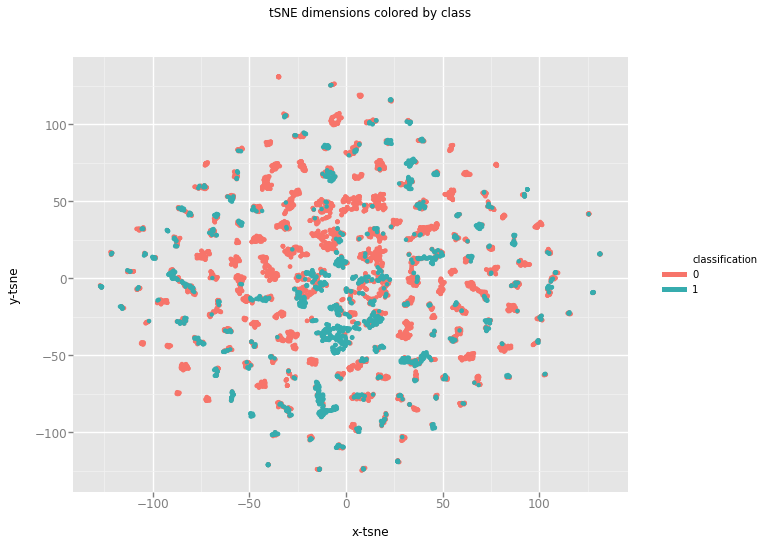

<ggplot: (141332521841)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =1000         Learning Rate =750


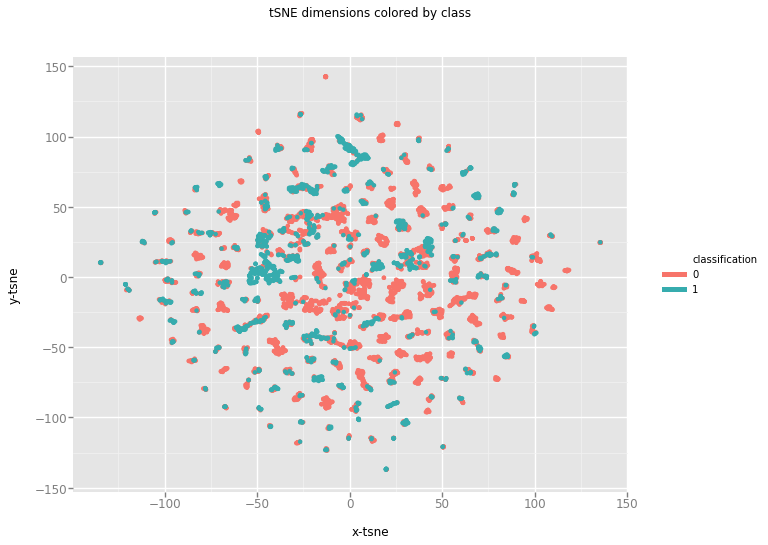

<ggplot: (-9223371895522258758)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =250         Learning Rate =100


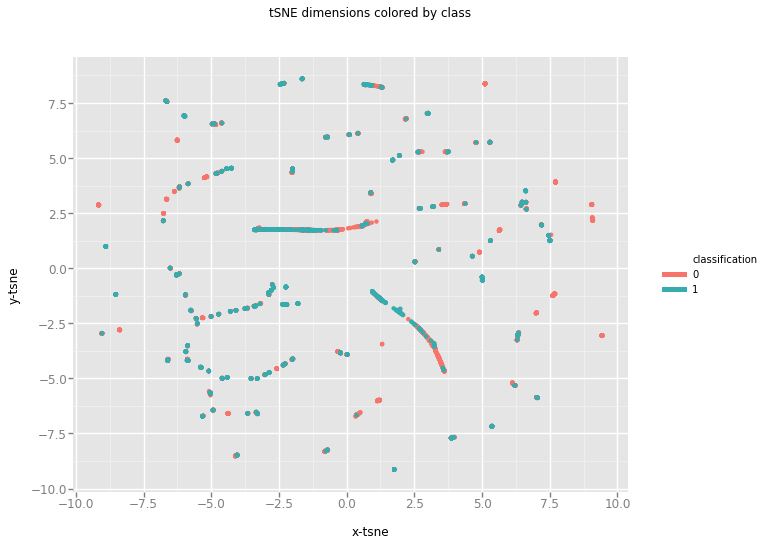

<ggplot: (-9223371895522580669)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =250         Learning Rate =250


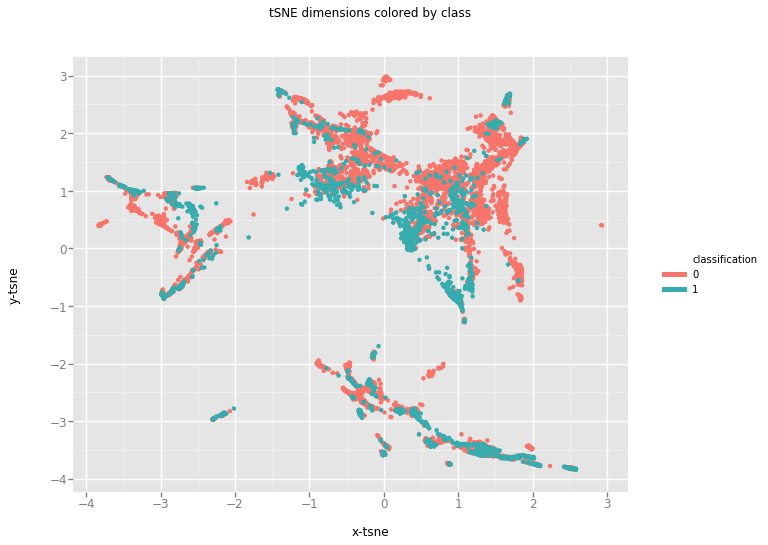

<ggplot: (-9223371895522261795)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =250         Learning Rate =500


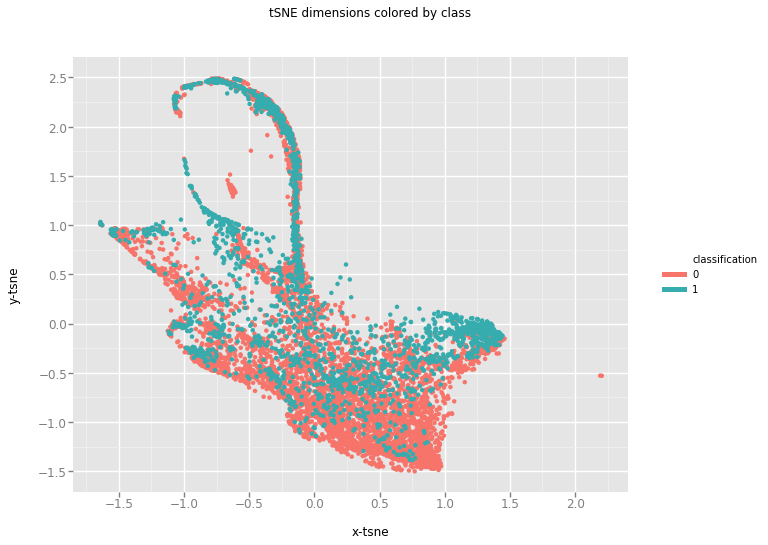

<ggplot: (141332480218)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =250         Learning Rate =750


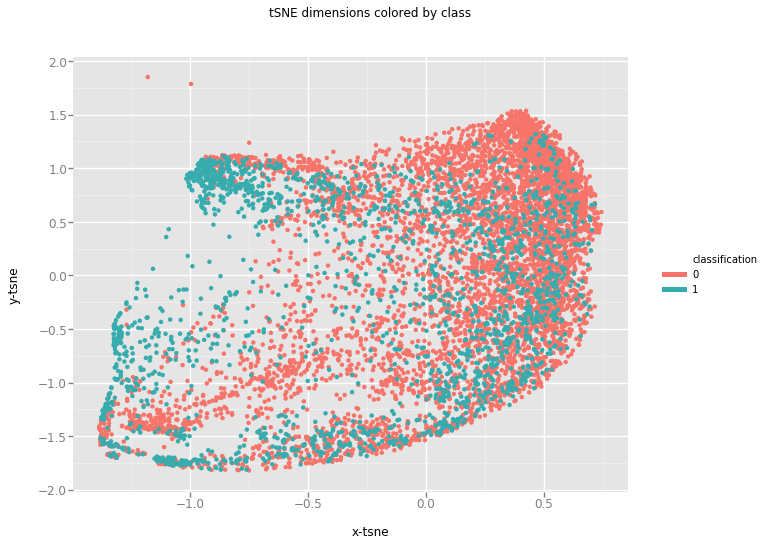

<ggplot: (-9223371895522641015)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =500         Learning Rate =100


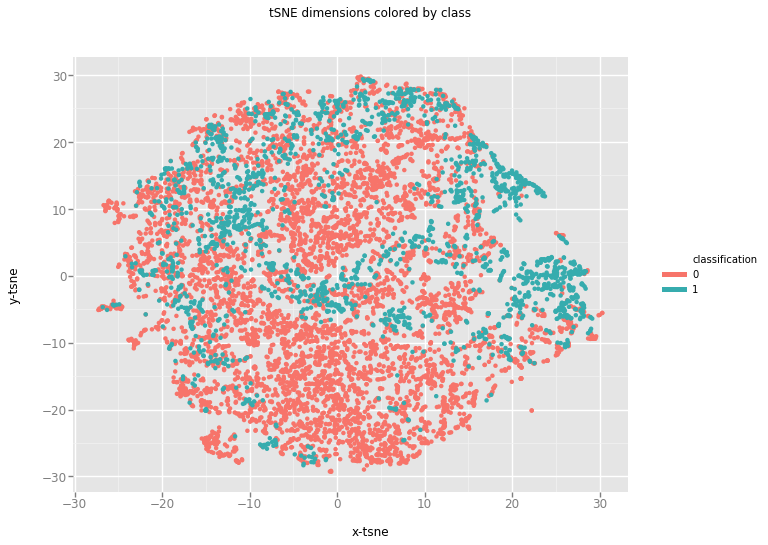

<ggplot: (-9223371895522640433)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =500         Learning Rate =250


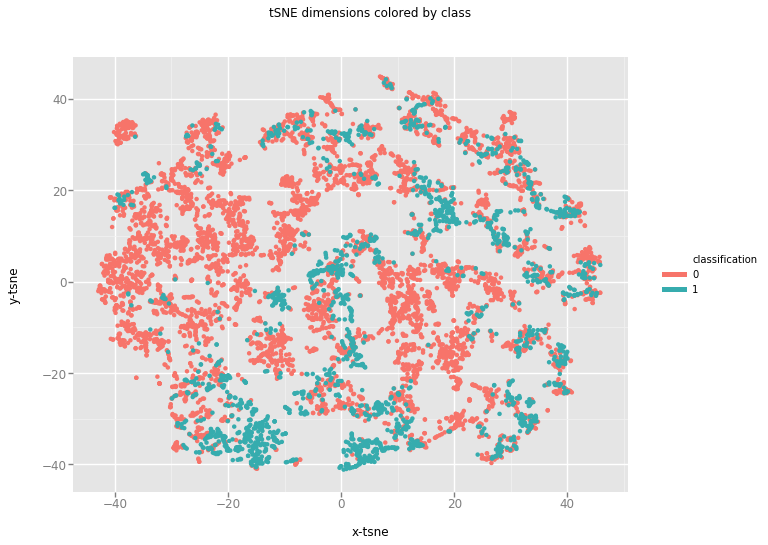

<ggplot: (141332160951)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =500         Learning Rate =500


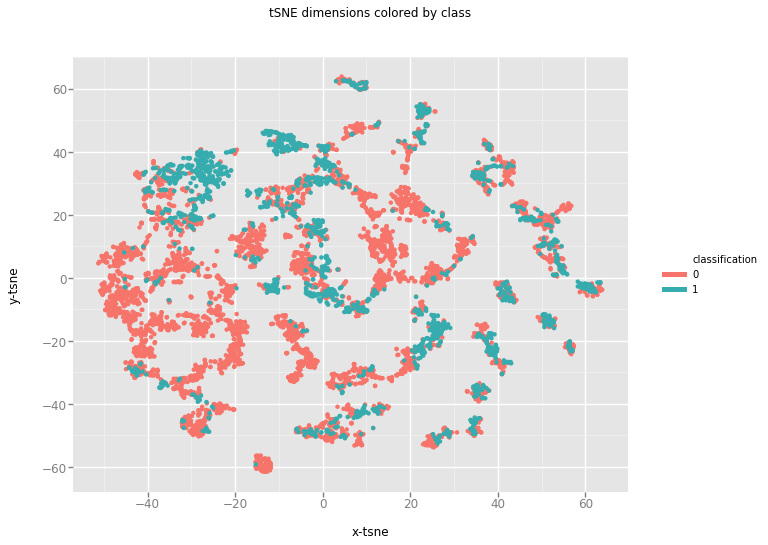

<ggplot: (141334155044)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =500         Learning Rate =750


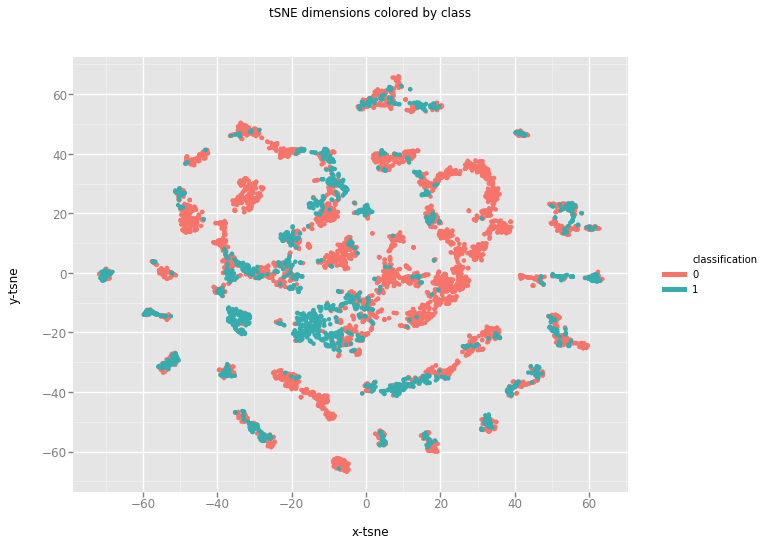

<ggplot: (-9223371895390862164)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =750         Learning Rate =100


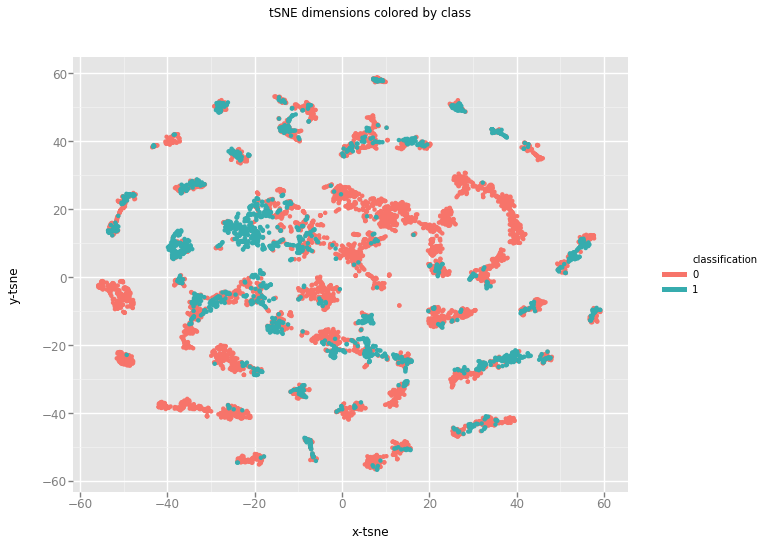

<ggplot: (141332143708)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =750         Learning Rate =250


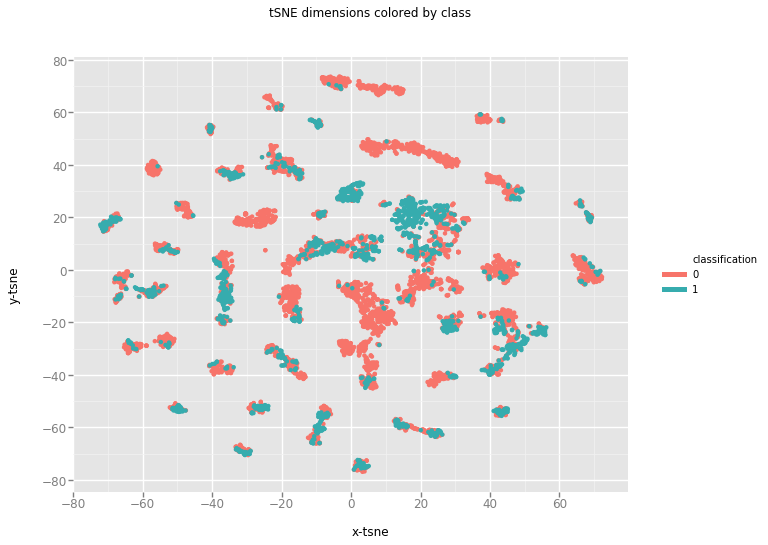

<ggplot: (-9223371895522578428)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =750         Learning Rate =500


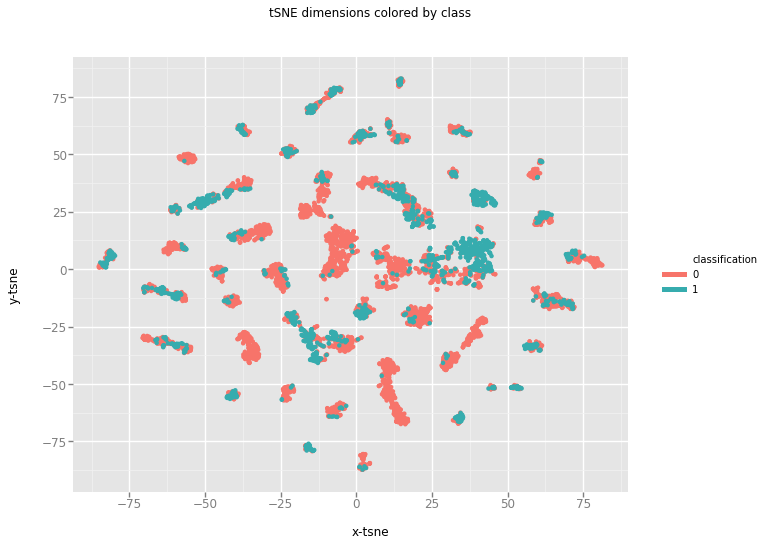

<ggplot: (-9223371895390840446)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =750         Learning Rate =750


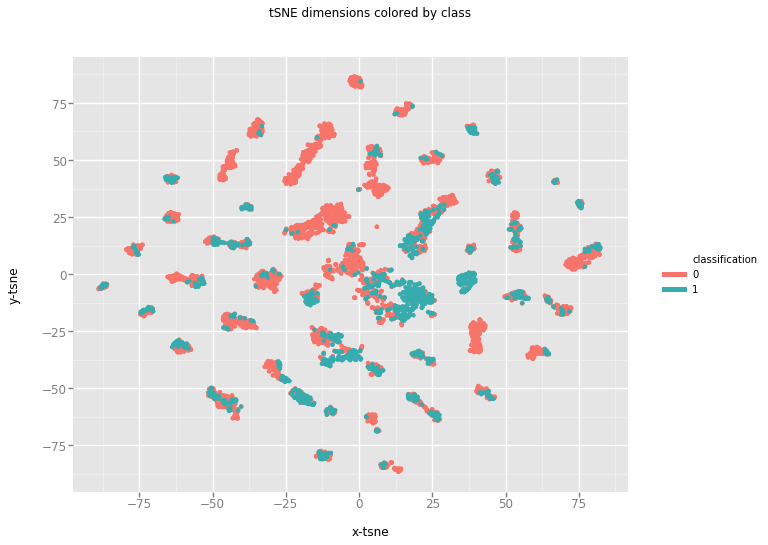

<ggplot: (141464137059)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =1000         Learning Rate =100


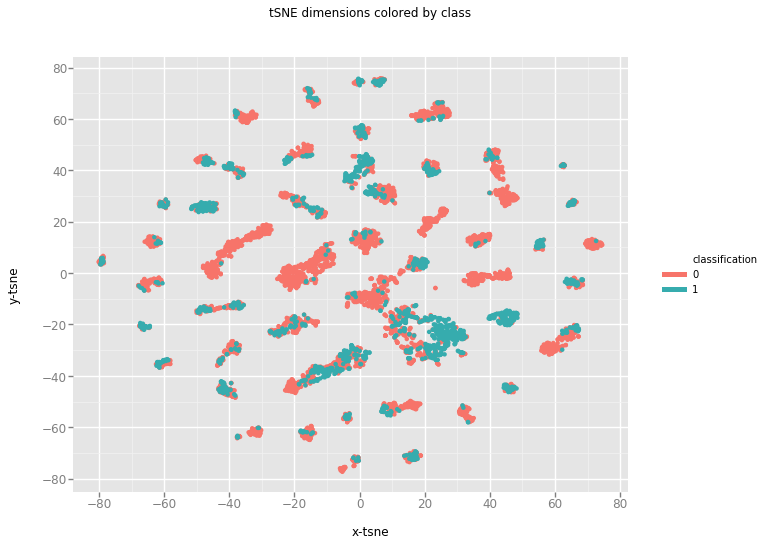

<ggplot: (141335527905)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =1000         Learning Rate =250


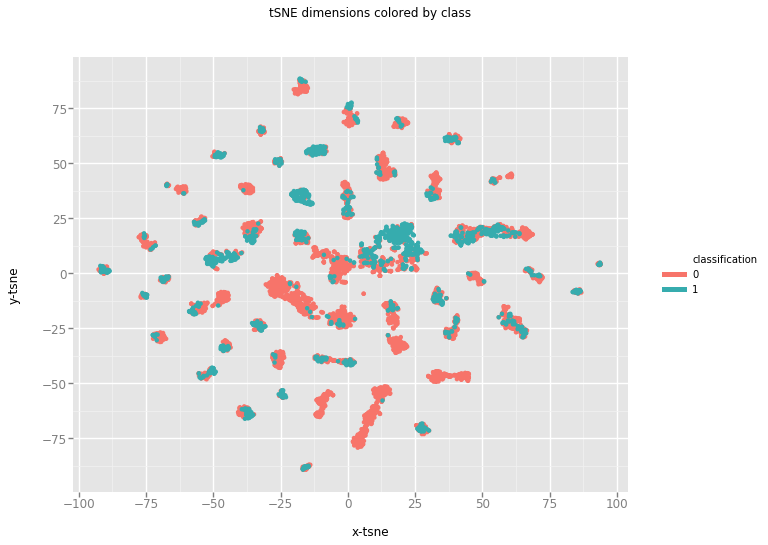

<ggplot: (-9223371895523480327)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =1000         Learning Rate =500


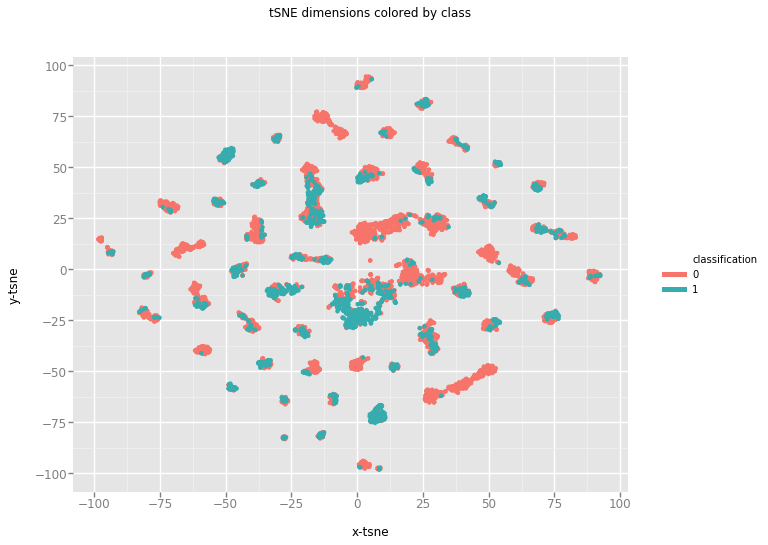

<ggplot: (141332183451)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =1000         Learning Rate =750


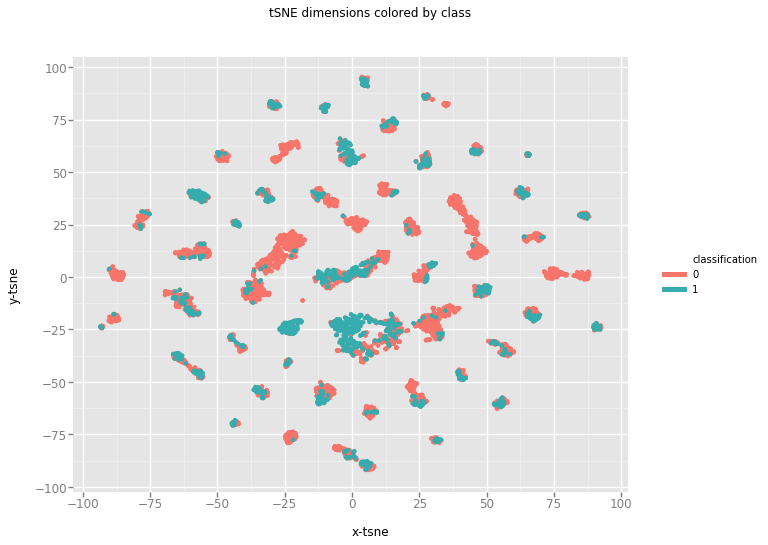

<ggplot: (-9223371895522140570)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
3366.3761950537446


In [21]:
start_time = timeit.default_timer()
for i in Perplexity:
    for j in n_iter:
        for k in learningRate:
            print("  Perplexity =" + str(i) + "          No of Iterations =" + str(j) + "         Learning Rate =" + str(k) )
            tsne_results=tSNEOptinmisation(i,j,k,principalDF)
            #Execution
            df_tsne = principalDF
            df_tsne['x-tsne'] = tsne_results[:,0]
            df_tsne['y-tsne'] = tsne_results[:,1]
            #df1.merge(df2)
            df_tsne = y.join(df_tsne)
            #PLOT t-SNE
            df_tsne.columns = df_tsne.columns.map(lambda x: x.replace(' ', '_'))
            chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='classification') ) \
                    + geom_point(size=20,alpha=1) \
                    + ggtitle("tSNE dimensions colored by class")
            print(chart)
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)